<a href="https://colab.research.google.com/github/hitanshu5/MachineLearning/blob/main/MLMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df = pd.read_excel('/content/Flight_train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_df[train_df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
train_df.drop(9039,axis=0,inplace=True)

In [ ]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


null values of Route and Total Stops were in the same tuple

In [ ]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_df['Date']=train_df['Date_of_Journey'].str.split('/').str[0]
train_df['Month']=train_df['Date_of_Journey'].str.split('/').str[1]
train_df['Year']=train_df['Date_of_Journey'].str.split('/').str[2]
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [ ]:
train_df.drop(columns=['Date_of_Journey'],inplace=True)

In [ ]:
train_df['Date'] = train_df['Date'].astype(int)
train_df['Month'] = train_df['Month'].astype(int)
train_df['Year'] = train_df['Year'].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Date             10682 non-null  int64 
 11  Month            10682 non-null  int64 
 12  Year             10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.4+ MB


In [ ]:
train_df['Dept_Hour']=train_df['Dep_Time'].str.split(':').str[0]
train_df['Dept_Min']=train_df['Dep_Time'].str.split(':').str[1]

In [ ]:
train_df['Dept_Hour']=train_df['Dept_Hour'].astype(int)
train_df['Dept_Min']=train_df['Dept_Min'].astype(int)
train_df.drop(columns=['Dep_Time'],inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Date             10682 non-null  int64 
 10  Month            10682 non-null  int64 
 11  Year             10682 non-null  int64 
 12  Dept_Hour        10682 non-null  int64 
 13  Dept_Min         10682 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.5+ MB


In [ ]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [ ]:
train_df['Arrival_Time']=train_df['Arrival_Time'].str.split(' ').str[0]
train_df['Arrival_Hour']=train_df['Arrival_Time'].str.split(':').str[0]
train_df['Arrival_Min']=train_df['Arrival_Time'].str.split(':').str[1]
train_df['Arrival_Hour']=train_df['Arrival_Hour'].astype(int)
train_df['Arrival_Min']=train_df['Arrival_Min'].astype(int)
train_df.drop(columns=['Arrival_Time'],inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int64 
 9   Month            10682 non-null  int64 
 10  Year             10682 non-null  int64 
 11  Dept_Hour        10682 non-null  int64 
 12  Dept_Min         10682 non-null  int64 
 13  Arrival_Hour     10682 non-null  int64 
 14  Arrival_Min      10682 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.6+ MB


In [ ]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [ ]:
 train_df['Duration_Hour'] = train_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
 train_df['Duration_Min'] = train_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [ ]:
train_df[train_df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,16,55,5m,NaN


In [ ]:
train_df.drop(6474,axis=0,inplace=True)

In [ ]:
train_df['Duration_Hour'] = train_df['Duration_Hour'].astype(int)

In [ ]:
train_df['Duration_Min'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [ ]:
train_df['Duration_Min'].fillna(0,inplace=True)

In [ ]:
train_df['Duration_Min'] = train_df['Duration_Min'].astype(int)

In [ ]:
train_df.drop(columns=['Duration'],inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  object
 5   Additional_Info  10681 non-null  object
 6   Price            10681 non-null  int64 
 7   Date             10681 non-null  int64 
 8   Month            10681 non-null  int64 
 9   Year             10681 non-null  int64 
 10  Dept_Hour        10681 non-null  int64 
 11  Dept_Min         10681 non-null  int64 
 12  Arrival_Hour     10681 non-null  int64 
 13  Arrival_Min      10681 non-null  int64 
 14  Duration_Hour    10681 non-null  int64 
 15  Duration_Min     10681 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.4+ MB


In [ ]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
train_df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

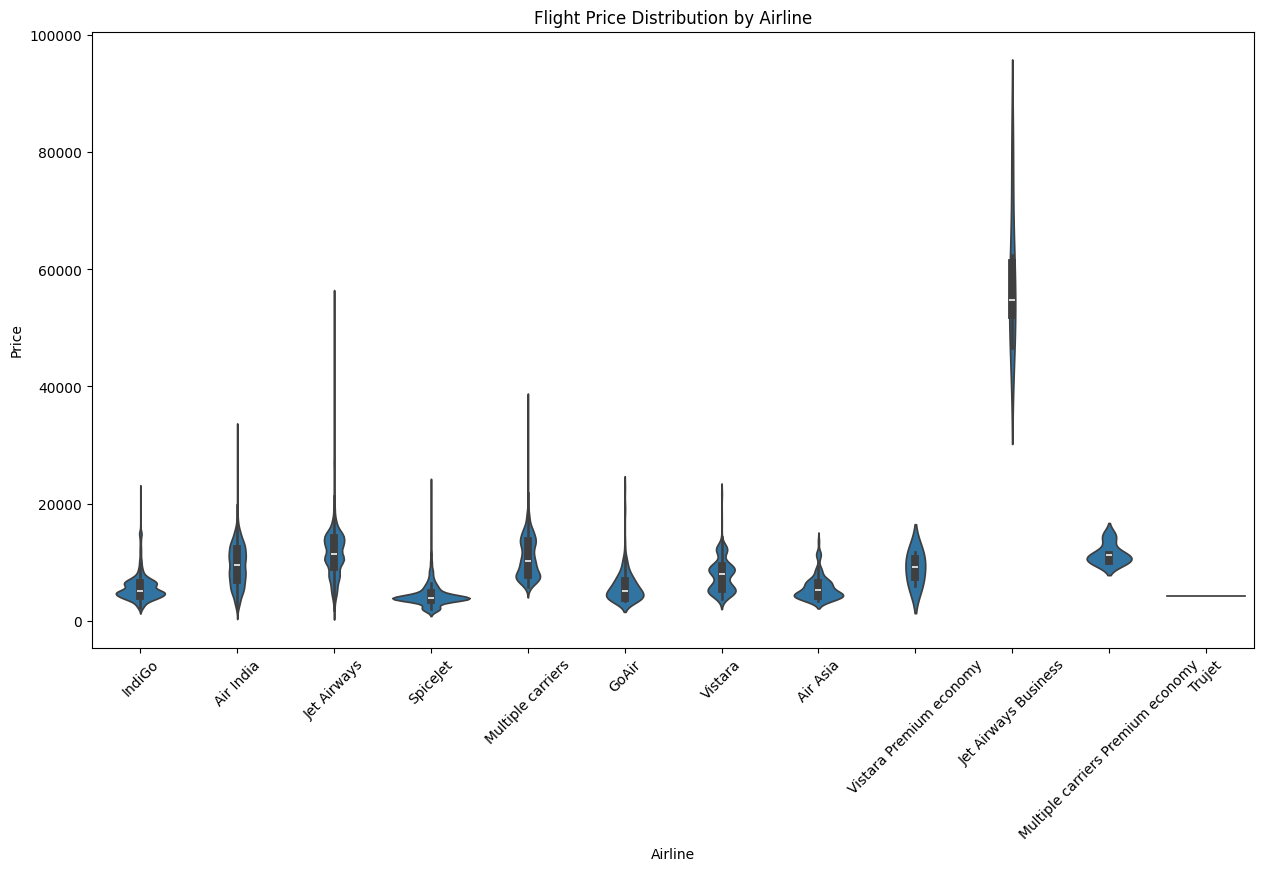

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.violinplot(x='Airline', y='Price', data=train_df)
plt.xticks(rotation=45)
plt.title('Flight Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

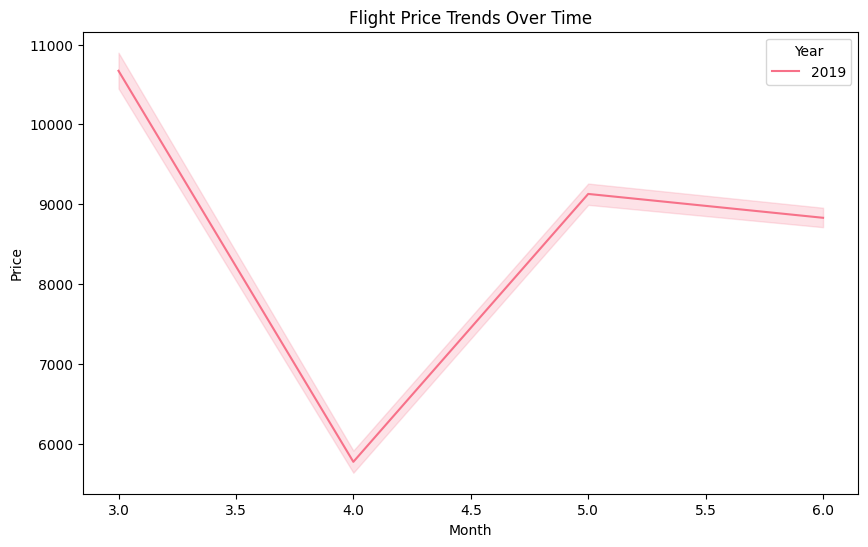

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Price', hue='Year', data=train_df, palette='husl')
plt.title('Flight Price Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(title='Year')
plt.show()

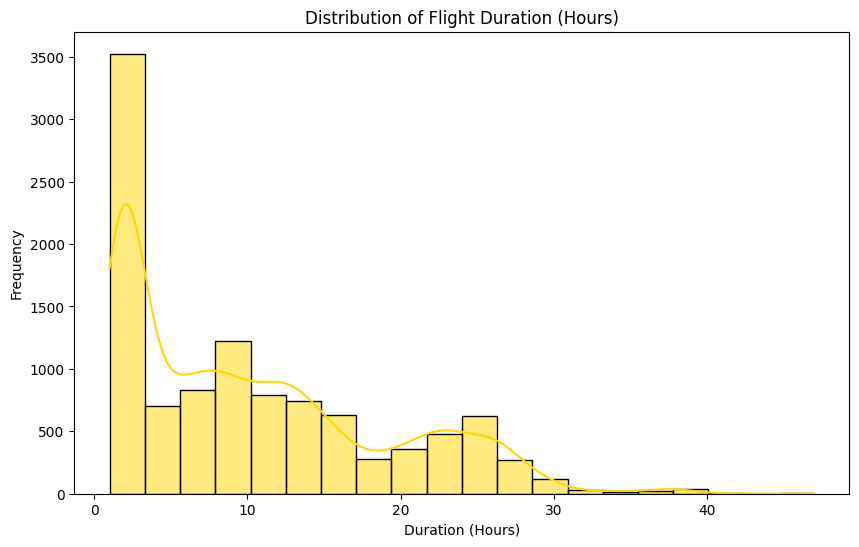

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Duration_Hour'], bins=20, kde=True, color='gold')
plt.title('Distribution of Flight Duration (Hours)')
plt.xlabel('Duration (Hours)')
plt.ylabel('Frequency')
plt.show()

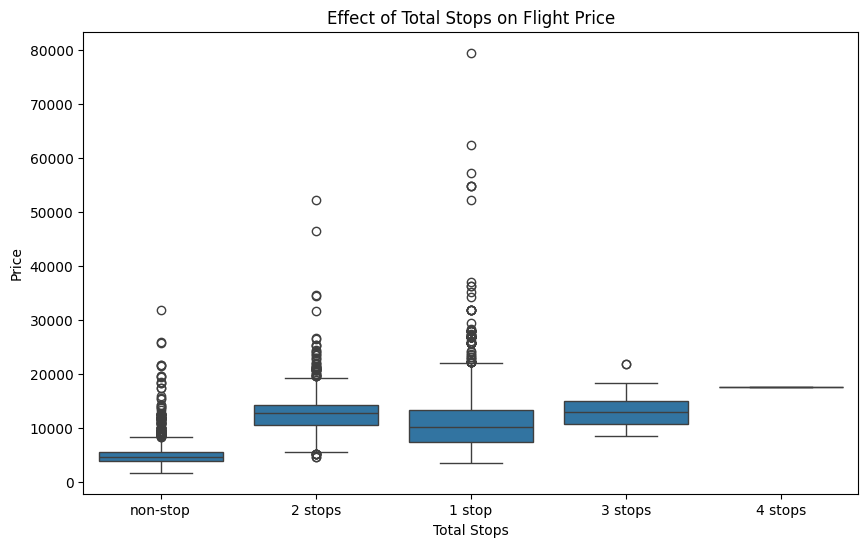

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=train_df)
plt.title('Effect of Total Stops on Flight Price')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

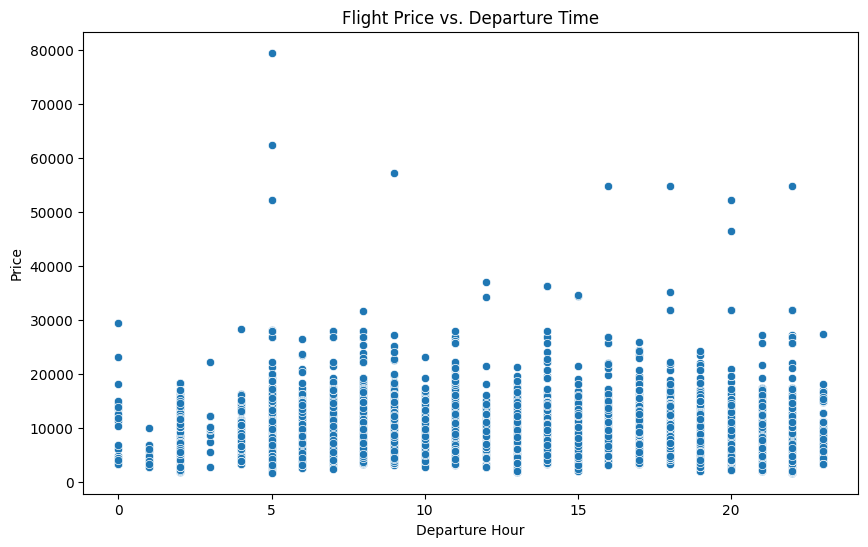

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dept_Hour', y='Price', data=train_df)
plt.title('Flight Price vs. Departure Time')
plt.xlabel('Departure Hour')
plt.ylabel('Price')
plt.show()

In [ ]:
Airline = train_df[['Airline']]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
  if carrier in ['Jet Airways','IndiGo','Air India','Multiple carriers','SpiceJet','Vistara','Air Asia','GoAir']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('other')

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

<ipython-input-36-fd259cce665f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline'] = pd.DataFrame(New_Airline_List)


Airline
Jet Airways          3849
IndiGo               2053
Air India            1749
Multiple carriers    1195
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
other                  23
Name: count, dtype: int64

In [ ]:
Airline = pd.get_dummies(Airline, drop_first=True)
Airline = Airline.astype(int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_other
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [ ]:
train_df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: count, dtype: int64

In [ ]:
Source = train_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source = Source.astype(int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
train_df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: count, dtype: int64

In [ ]:
Destination = train_df[['Destination']]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

<ipython-input-41-45107eb6b7bc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['Destination'] = pd.DataFrame(New_Destination_List)


In [ ]:
Destination = pd.get_dummies(Destination,drop_first=True)
Destination = Destination.astype(int)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [ ]:
train_df.drop(columns=['Route','Additional_Info'],inplace=True)

In [ ]:
train_df['Total_Stops']=train_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
final_df = pd.concat([train_df,Airline,Source,Destination],axis=1)
final_df.drop(columns=['Airline','Source','Destination'],inplace=True)

final_df.head()

,Total_Stops,Price,Date,Month,Year,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min,Duration_Hour,...,Airline_Vistara,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(final_df.shape)

(10681, 27)


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Total_Stops                10681 non-null  int64
 1   Price                      10681 non-null  int64
 2   Date                       10681 non-null  int64
 3   Month                      10681 non-null  int64
 4   Year                       10681 non-null  int64
 5   Dept_Hour                  10681 non-null  int64
 6   Dept_Min                   10681 non-null  int64
 7   Arrival_Hour               10681 non-null  int64
 8   Arrival_Min                10681 non-null  int64
 9   Duration_Hour              10681 non-null  int64
 10  Duration_Min               10681 non-null  int64
 11  Airline_Air India          10681 non-null  int64
 12  Airline_GoAir              10681 non-null  int64
 13  Airline_IndiGo             10681 non-null  int64
 14  Airline_Jet Airways        

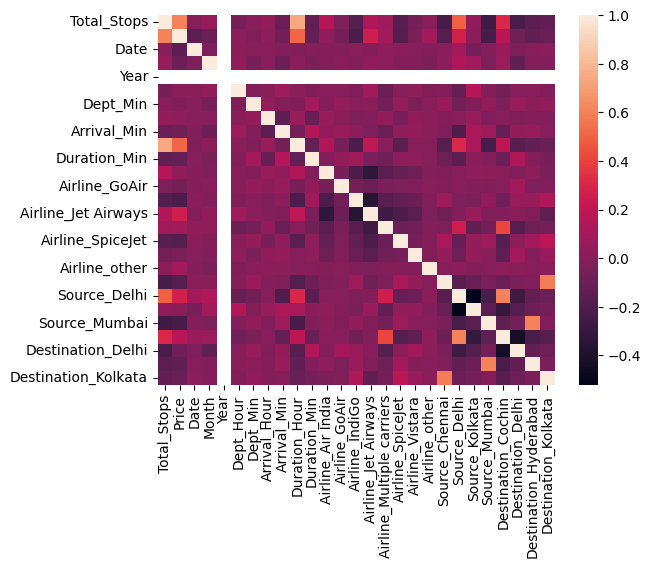

In [ ]:
sns.heatmap(final_df.corr())
plt.show()

In [ ]:
X=final_df[['Total_Stops','Date','Month','Year','Dept_Hour','Dept_Min','Arrival_Hour','Arrival_Min','Duration_Hour','Duration_Min','Airline_Air India','Airline_GoAir','Airline_IndiGo','Airline_Jet Airways','Airline_Multiple carriers','Airline_SpiceJet','Airline_Vistara','Airline_other','Source_Chennai','Source_Delhi','Source_Kolkata','Source_Mumbai','Destination_Cochin','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata']]

In [ ]:
y=final_df['Price']

In [ ]:
print(X.shape,y.shape)

(10681, 26) (10681,)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

print(selection.feature_importances_)

[0.28984299 0.13726637 0.06606275 0.         0.0377713  0.03562736
 0.0471651  0.0323417  0.14640826 0.02682775 0.0073418  0.00175072
 0.00662759 0.0372298  0.0070452  0.00376603 0.00291621 0.01755904
 0.00165205 0.03302825 0.01878653 0.0061078  0.01188546 0.01772997
 0.00465415 0.00260582]


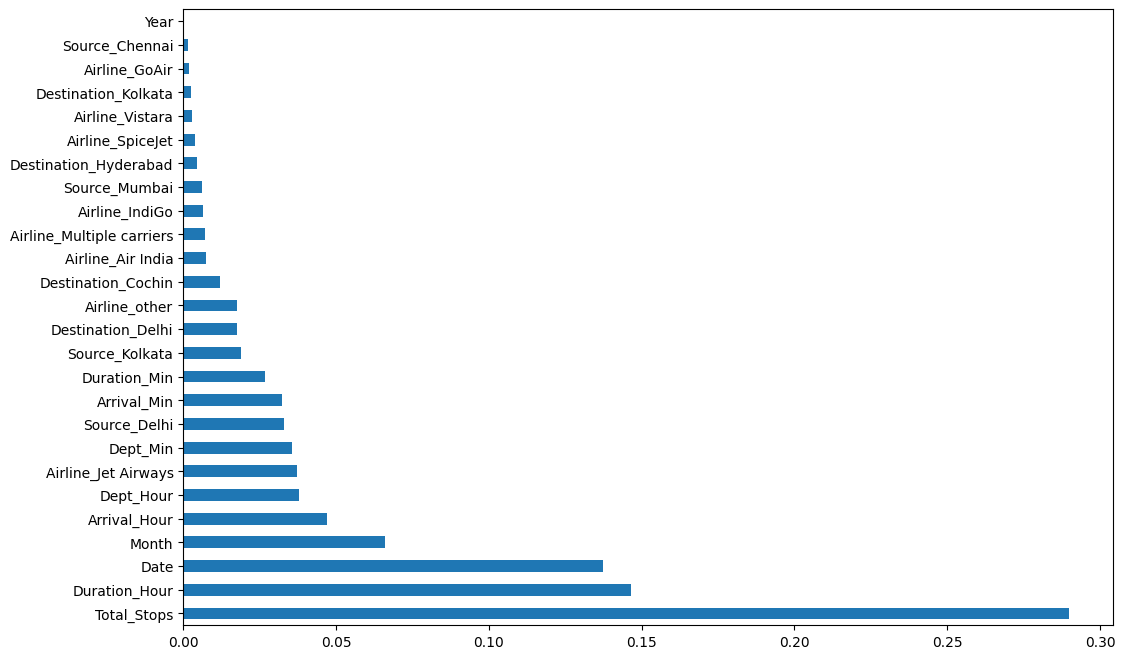

In [ ]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(26).plot(kind='barh')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
  vif = pd.DataFrame()
  vif['variables'] = z.columns
  vif['VIF'] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
  return(vif)

In [ ]:
calc_vif(X)

,variables,VIF
0,Total_Stops,2.944884
1,Date,1.021059
2,Month,1.101143
3,Year,86.749649
4,Dept_Hour,1.049742
5,Dept_Min,1.057674
6,Arrival_Hour,1.057896
7,Arrival_Min,1.115797
8,Duration_Hour,2.375687
9,Duration_Min,1.127660


In [ ]:
X=final_df[['Total_Stops','Date','Month','Dept_Hour','Dept_Min','Arrival_Hour','Arrival_Min','Duration_Hour','Duration_Min','Airline_Air India','Airline_GoAir','Airline_IndiGo','Airline_Jet Airways','Airline_Multiple carriers','Airline_SpiceJet','Airline_Vistara','Airline_other','Source_Chennai','Source_Delhi','Source_Kolkata','Source_Mumbai','Destination_Cochin','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata']]

In [ ]:
X.head()

,Total_Stops,Date,Month,Dept_Hour,Dept_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,Airline_Air India,...,Airline_Vistara,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
calc_vif(X)

,variables,VIF
0,Total_Stops,7.322454
1,Date,3.471022
2,Month,15.384614
3,Dept_Hour,5.697768
4,Dept_Min,2.735111
5,Arrival_Hour,4.720609
6,Arrival_Min,3.377540
7,Duration_Hour,5.813870
8,Duration_Min,4.003182
9,Airline_Air India,4.435427


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear_pred = linear.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
linear_score=r2_score(linear_pred,y_test)
linear_score

0.003600909976055666

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
tree_pred = tree.predict(X_test)

In [ ]:
tree_score = r2_score(tree_pred,y_test)
tree_score

0.6436131020423808

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
random_forest_pred = random_forest.predict(X_test)

In [ ]:
random_forest_score = r2_score(random_forest_pred,y_test)
random_forest_score

0.7352189772857496

In [ ]:
print(round(random_forest.score(X_train,y_train)*100,2))

96.17


In [ ]:
print(round(random_forest.score(X_test,y_test)*100,2))

77.97


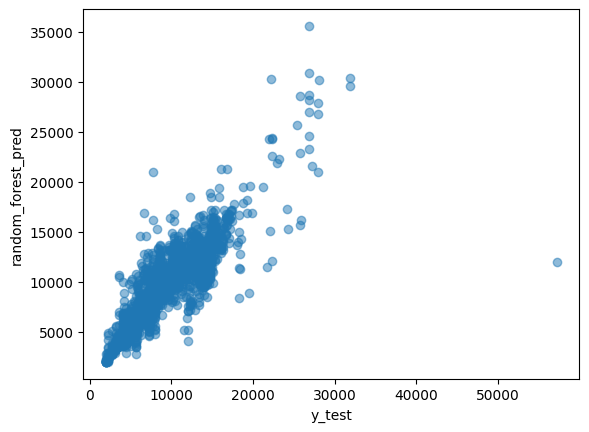

In [ ]:
plt.scatter(y_test,random_forest_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('random_forest_pred')
plt.show()

([<matplotlib.patches.Wedge at 0x7c30ab452050>,
 [Text(1.0999625732783682, 0.009073995086544892, 'Linear Regression'),
  Text(0.11672318882996248, 1.0937896037124164, 'Decison Tree Regressor'),
  Text(-0.12574197440347715, -1.092789529540394, 'Random Forest Regressor')],
 [Text(0.5999795854245644, 0.004949451865388122, '0.26%'),
  Text(0.06366719390725226, 0.5966125111158634, '46.09%'),
  Text(-0.0685865314928057, -0.5960670161129421, '53.65%')])

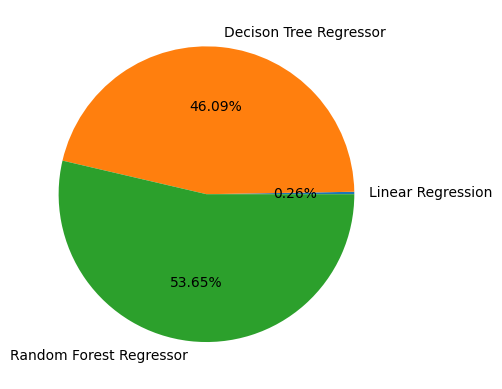

In [ ]:
r2_scores = {
    "Linear Regression": 0.003600909976055666,
    "Decison Tree Regressor": 0.6320709717106078,
    "Random Forest Regressor": 0.7356878314698677
}

plt.pie(r2_scores.values(),labels=r2_scores.keys(),autopct='%0.2f%%')

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse=mean_squared_error(y_test,random_forest_pred)
print('Mean Squared Error:',mse)
mae=mean_absolute_error(y_test,random_forest_pred)
print('Mean Absolute Error:',mae)
rmse=np.sqrt(mse)
print('Root Mean Squared Error:',rmse)
nrmse = round(np.sqrt(mse)/(max(y_test)-min(y_test)),2)
print('Normalized Root Mean Squared Error:',nrmse)
print('Max Value:',max(y))
print('Min Value',min(y))

Mean Squared Error: 4651914.403586387
Mean Absolute Error: 1257.2251389726193
Root Mean Squared Error: 2156.8297113092603
Normalized Root Mean Squared Error: 0.04
Max Value: 79512
Min Value 1759


In [ ]:
import pickle

In [ ]:
with open('mlproject','wb') as f:
  pickle.dump(random_forest,f)

In [76]:
with open('mlproject','rb') as f:
  a = pickle.load(f)

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
random_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [82]:
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5,
                               verbose=2, random_state=42, n_jobs = 1)

In [83]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  22.2s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  22.4s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  22.3s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  22.2s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  22.0s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.5s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  24.0s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.4s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.7s
[CV] END max_depth=2

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_depth': 30}

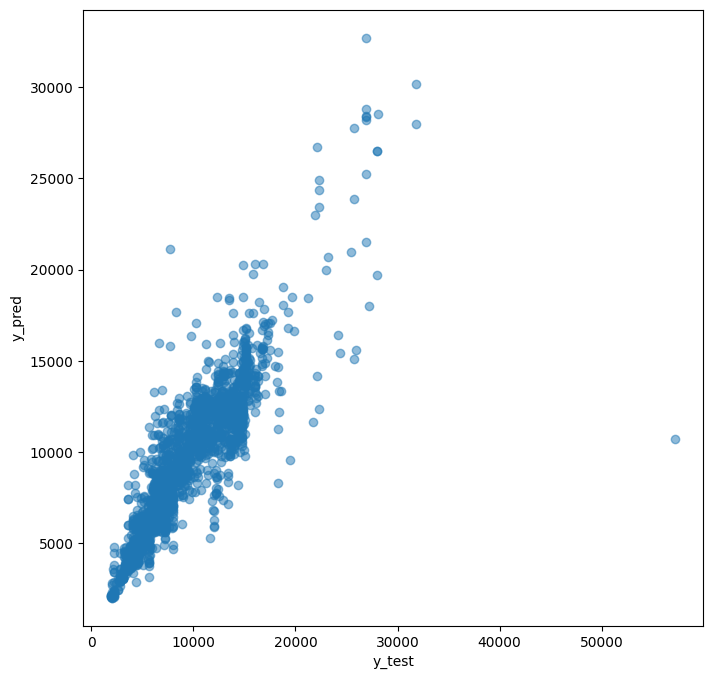

In [85]:
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [89]:
from sklearn import metrics
print('R2 value: ', round(metrics.r2_score(y_test, prediction),2))
print('RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, prediction)),2))
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, prediction))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y_test), '\nMin Value: ', min(y_test))

R2 value:  0.79
RMSE:  2127.23
Normalized RMSE:  0.04
Max Value:  57209 
Min Value:  1965


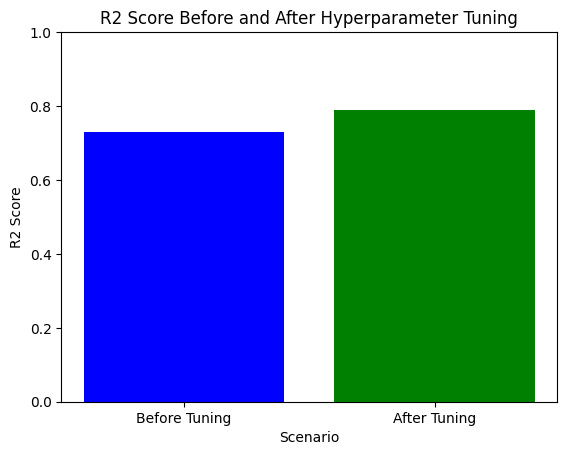

In [91]:
import matplotlib.pyplot as plt

# R^2 scores before and after hyperparameter tuning
r2_scores = {'Before Tuning': 0.73, 'After Tuning': 0.79}

# Plotting the R^2 scores
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green'])
plt.xlabel('Scenario')
plt.ylabel('R2 Score')
plt.title('R2 Score Before and After Hyperparameter Tuning')
plt.ylim(0, 1)  # Set y-axis limits to ensure consistency
plt.show()